# preamble

In [1]:
import os
import sys

In [2]:
def insert_into_path(fo):
    for fo_in_path in sys.path:
        if fo == fo_in_path:
            print('noop')
            return
        
    sys.path.insert(0, fo)
    
insert_into_path('../h2py')
insert_into_path('../h2py/chromatic')

In [3]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

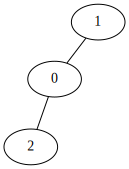

In [10]:
import numpy as np
import operator

from graph import UGraph
_graph = UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(0,2)]})
_graph.graph_viz()

# Notes

## DSatur

**Saturation Degree**   
Number of different colors to which it is adjacent (colored vertices)

1. Arrange vertices by decreasing order of degrees
1. Color a vertex of maximal degree with color 1
1. Choose a vertex with a maximal saturation degree.
  * If there is an equality, choose any vertex of maximal degree in the uncolored **subgraph**
1. Color the chosen vertex with the least possible (lowest numbered) color
1. If all the vertices are colored, stop.
  * Otherwise, return to 3

Doubt:  
1. In step 3, in case of equality, should we consider the vertex of maximum degree in the subgraph induced by the uncolored vertices?  

In [16]:
from dsatur import DSatur

In [3]:
[DSatur(UGraph.graph_from_edges({'num_vertices':2, 'edges': [(0,1)]})).colors,
 DSatur(UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2)]})).colors,
 DSatur(UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2),(2,0)]})).colors,
 DSatur(UGraph.graph_from_edges({'num_vertices':4, 'edges': [(0,1),(1,2),(2,3),(3,0)]})).colors,]

[[0, 1], [1, 0, 1], [0, 1, 2], [1, 0, 1, 0]]

## coloration order

In [11]:
from coloration_order import ColorationOrder

In [12]:
_graphs = [
    UGraph.graph_from_edges({'num_vertices':2, 'edges': [(0,1)]}),
    UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2)]}),
    UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2),(2,0)]}),
    UGraph.graph_from_edges({'num_vertices':4, 'edges': [(0,1),(1,2),(2,3),(3,0)]})
]

In [13]:
def coloration_order(graph):
    display(HTML(graph.graph_viz()._repr_svg_()))
    print('coloration order', ColorationOrder.get(graph))
    
interact(coloration_order, graph=_graphs)

interactive(children=(Dropdown(description='graph', options=(<graph.UGraph object at 0x7f0f877cbeb8>, <graph.UGraph object at 0x7f0f877cbef0>, <graph.UGraph object at 0x7f0f877cbf28>, <graph.UGraph object at 0x7f0f877cbf60>), value=<graph.UGraph object at 0x7f0f877cbeb8>), Output()), _dom_classes=('widget-interact',))

<function __main__.coloration_order>

# brelaz

In [21]:
from brelaz import Brelaz
from dsatur import DSatur

_graphs = [
    UGraph.graph_from_edges({'num_vertices':2, 'edges': [(0,1)]}),
    UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2)]}),
    UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(1,2),(2,0)]}),
    UGraph.graph_from_edges({'num_vertices':4, 'edges': [(0,1),(1,2),(2,3),(3,0)]})
]

def brelaz_compute(graph):
    display(HTML(graph.graph_viz()._repr_svg_()))
    _colors = Brelaz(graph, verbose=True).compute()
    gviz = DSatur.color_graph(graph, _colors)
    display(HTML(gviz._repr_svg_()))

brelaz_compute(_graphs[3])

brelaz: coloration order: [0, 1, 2, 3]
brelaz: coloration: [1, 0, 1, 0] max-clique: [1]
brelaz: w: 1 r: 2
brelaz: [3] colors[2] = 1
brelaz: [4] vix: 3 vx: 3 u_xk: {1}
brelaz: [5] COMPLETE vix: 3 vx: 3


Exception: No vertex of color 3 found

In [22]:
def brelaz_compute(graph):
    display(HTML(graph.graph_viz()._repr_svg_()))
    _colors = Brelaz(graph, verbose=True).compute()
    gviz = DSatur.color_graph(graph, _colors)
    display(HTML(gviz._repr_svg_()))

interact(brelaz_compute, graph=_graphs)

interactive(children=(Dropdown(description='graph', options=(<graph.UGraph object at 0x7f21b2455e48>, <graph.UGraph object at 0x7f21b24551d0>, <graph.UGraph object at 0x7f21b2455588>, <graph.UGraph object at 0x7f21b2455898>), value=<graph.UGraph object at 0x7f21b2455e48>), Output()), _dom_classes=('widget-interact',))

<function __main__.brelaz_compute>

# exact

In [5]:
from graph import UGraph
from chromatic.brute_force import BruteForce as BruteForceCI

In [6]:
def csv_to_ci_inputs():
    fi_unique_certificates = '../../data/d_db_unique_certificates.csv'
    if not os.path.isfile(fi_unique_certificates):
        return []
    
    lines = []
    with open(fi_unique_certificates, 'r') as f:
        for line in f:
            if len(line) < 2:
                continue
            num_vertices, graph_id = line.split(",")
            num_vertices = int(num_vertices)
            graph_id = int(graph_id[1:])
            lines.append((num_vertices, graph_id))
    return lines

In [7]:
csv_to_ci_inputs()

[(3, 7),
 (3, 3),
 (4, 13),
 (4, 7),
 (4, 31),
 (4, 15),
 (4, 63),
 (4, 30),
 (5, 15),
 (5, 29),
 (5, 220),
 (5, 59),
 (5, 31),
 (5, 221),
 (5, 207),
 (5, 187),
 (5, 255),
 (5, 511),
 (5, 1023),
 (5, 126),
 (5, 58),
 (5, 495),
 (5, 127),
 (5, 62),
 (5, 223),
 (5, 191),
 (5, 185),
 (5, 254),
 (5, 63)]

In [12]:
# ?interact

In [8]:
ci_pmtrs = csv_to_ci_inputs()
@interact(ix_pmtr=range(len(ci_pmtrs)))
def show_coloration(ix_pmtr):
    num_vertices, graph_id = ci_pmtrs[ix_pmtr]
    graph = UGraph.graph_from_graph_id(num_vertices, graph_id)
    coloration = BruteForceCI.compute(graph)
    gviz = graph.color_graph(coloration)
    display(HTML(gviz._repr_svg_()))

# interact(show_coloration, pmtrs=ci_pmtrs)

interactive(children=(Dropdown(description='ix_pmtr', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28), value=0), Output()), _dom_classes=('widget-interact',))

# scratchyard